# James Harden

## Jaimez Hurden

In [20]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
import pandas as pd
import seaborn as sns

In [21]:
# Setup the transport and client
_transport = RequestsHTTPTransport(
    url='http://127.0.0.1:8000/graphql/',
    use_json=True,
)

client = Client(
    transport = _transport,
    fetch_schema_from_transport=True,
)

# Define Query
query = gql('''
query playerAdvancedTotals {
  playerAdvancedAll (name: "James Harden") {
    playerName
    season
    team
    position
    age
    winShares
    offensiveWs
    defensiveWs
    usagePercent
    minutesPlayed
    tsPercent
    assistPercent
    blockPercent
    offensiveRbPercent
    defensiveRbPercent
    ftr
    games
    per
    winSharesPer
    vorp
    turnoverPercent
    totalRbPercent
    threePAr
    stealPercent
    playerId
    id
  }
  playerTotalsAll (name: "James Harden") {
      playerName
      season
      team
      position
      age
      effectFgPercent
      minutesPg
      twoPercent
      threePercent
      points
      assists
      blocks
      defensiveRb
      fieldAttempts
      fieldGoals
      ft
      fieldPercent
      ftAttempts
      ftPercent
      games
      gamesStarted
      offensiveRb
      personalFouls
      playerId
      steals
      threeAttempts
      threeFg
      totalRb
      turnovers
      twoFg
      playerId
      id
  }
}
''')

# Execute and store response

response = client.execute(query)

print(response)

{'playerAdvancedAll': [{'playerName': 'James Harden', 'season': 2023, 'team': 'PHI', 'position': 'PG', 'age': 33, 'winShares': '8.4', 'offensiveWs': '5.8', 'defensiveWs': '2.6', 'usagePercent': '25.000', 'minutesPlayed': 2135, 'tsPercent': '0.607', 'assistPercent': '43.300', 'blockPercent': '1.400', 'offensiveRbPercent': '2.300', 'defensiveRbPercent': '17.100', 'ftr': '0.429', 'games': 58, 'per': '21.6', 'winSharesPer': '0.188', 'vorp': '4.0', 'turnoverPercent': '16.300', 'totalRbPercent': '9.800', 'threePAr': '0.496', 'stealPercent': '1.600', 'playerId': 'hardeja01', 'id': '246'}, {'playerName': 'James Harden', 'season': 2022, 'team': 'TOT', 'position': 'PG', 'age': 32, 'winShares': '7.6', 'offensiveWs': '4.9', 'defensiveWs': '2.7', 'usagePercent': '27.200', 'minutesPlayed': 2420, 'tsPercent': '0.583', 'assistPercent': '40.300', 'blockPercent': '1.300', 'offensiveRbPercent': '2.600', 'defensiveRbPercent': '19.700', 'ftr': '0.540', 'games': 65, 'per': '20.9', 'winSharesPer': '0.152', '

In [44]:
df_advanced = pd.DataFrame(response['playerAdvancedAll'])

df_total = pd.DataFrame(response['playerTotalsAll'])

final_df = pd.merge(df_advanced, df_total, on=['playerName', 'season', 'team', 'position', 'age', 'id'])

final_df['winShares']= final_df['winShares'].astype(float)
final_df['usagePercent']= final_df['usagePercent'].astype(float)

final_df.columns

Index(['playerName', 'season', 'team', 'position', 'age', 'winShares',
       'offensiveWs', 'defensiveWs', 'usagePercent', 'minutesPlayed',
       'tsPercent', 'assistPercent', 'blockPercent', 'offensiveRbPercent',
       'defensiveRbPercent', 'ftr', 'games_x', 'per', 'winSharesPer', 'vorp',
       'turnoverPercent', 'totalRbPercent', 'threePAr', 'stealPercent',
       'playerId_x', 'id', 'effectFgPercent', 'minutesPg', 'twoPercent',
       'threePercent', 'points', 'assists', 'blocks', 'defensiveRb',
       'fieldAttempts', 'fieldGoals', 'ft', 'fieldPercent', 'ftAttempts',
       'ftPercent', 'games_y', 'gamesStarted', 'offensiveRb', 'personalFouls',
       'playerId_y', 'steals', 'threeAttempts', 'threeFg', 'totalRb',
       'turnovers', 'twoFg'],
      dtype='object')

Text(0, 0.5, 'Points per Game')

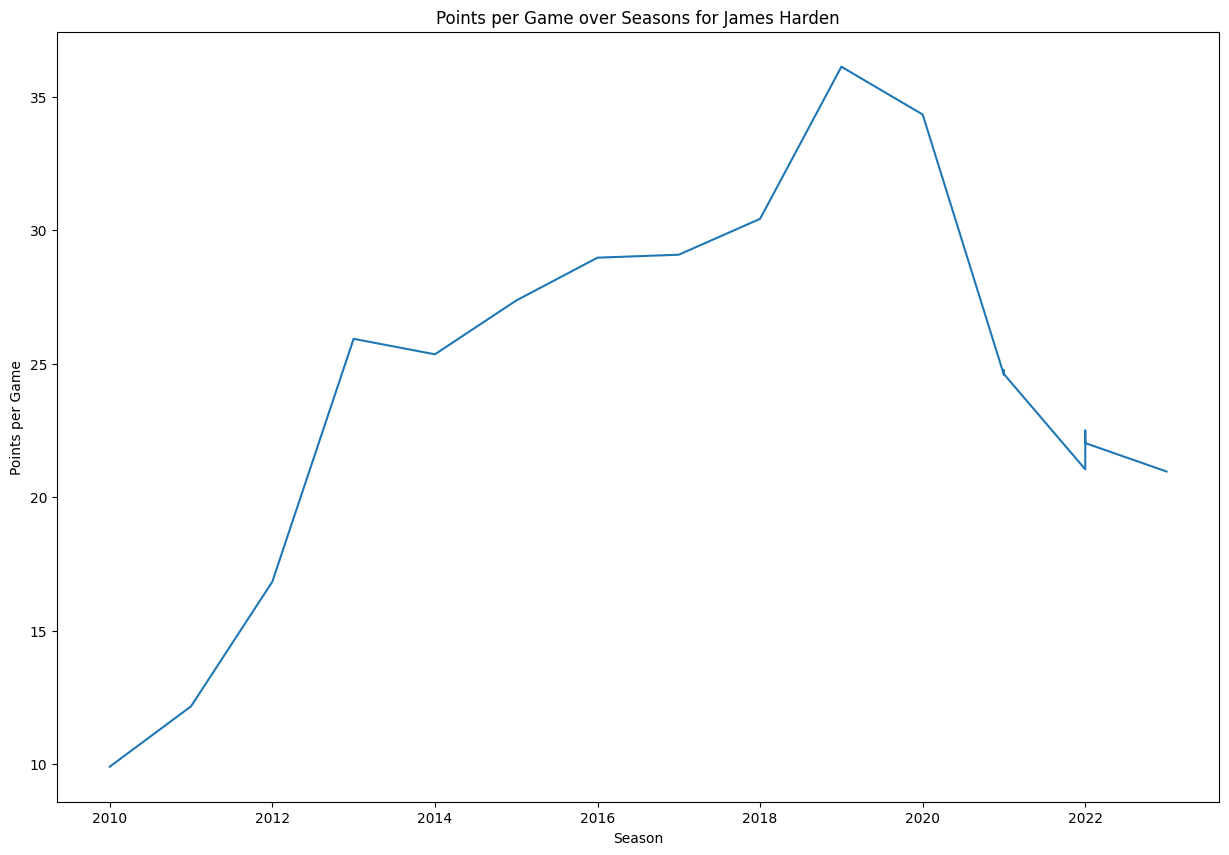

In [45]:
# Assuming pandas dataframe 'df'

# Time-Series Analysis for Points per game over seasons
plt.figure(figsize=(15,10))
plt.plot(final_df[final_df['playerName']=='James Harden']['season'], final_df[final_df['playerName']=='James Harden']['points']/final_df[final_df['playerName']=='James Harden']['games_x'])
plt.title('Points per Game over Seasons for James Harden')
plt.xlabel('Season')
plt.ylabel('Points per Game')

Text(0, 0.5, 'Win Shares')

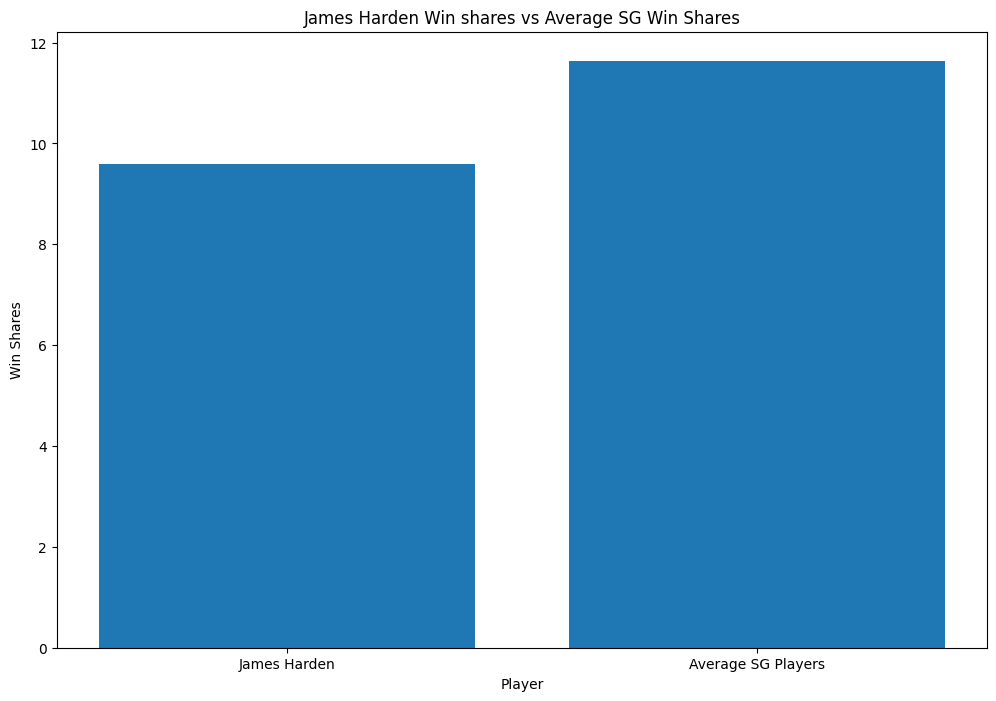

In [46]:
# Comparative Analysis for Win Shares
plt.figure(figsize=(12,8))
plt.bar(['James Harden', 'Average SG Players'], [final_df[final_df['playerName']=='James Harden']['winShares'].mean(), final_df[final_df['position']=='SG']['winShares'].mean()])
plt.title('James Harden Win shares vs Average SG Win Shares')
plt.xlabel('Player')
plt.ylabel('Win Shares')

Text(0, 0.5, 'Win Shares')

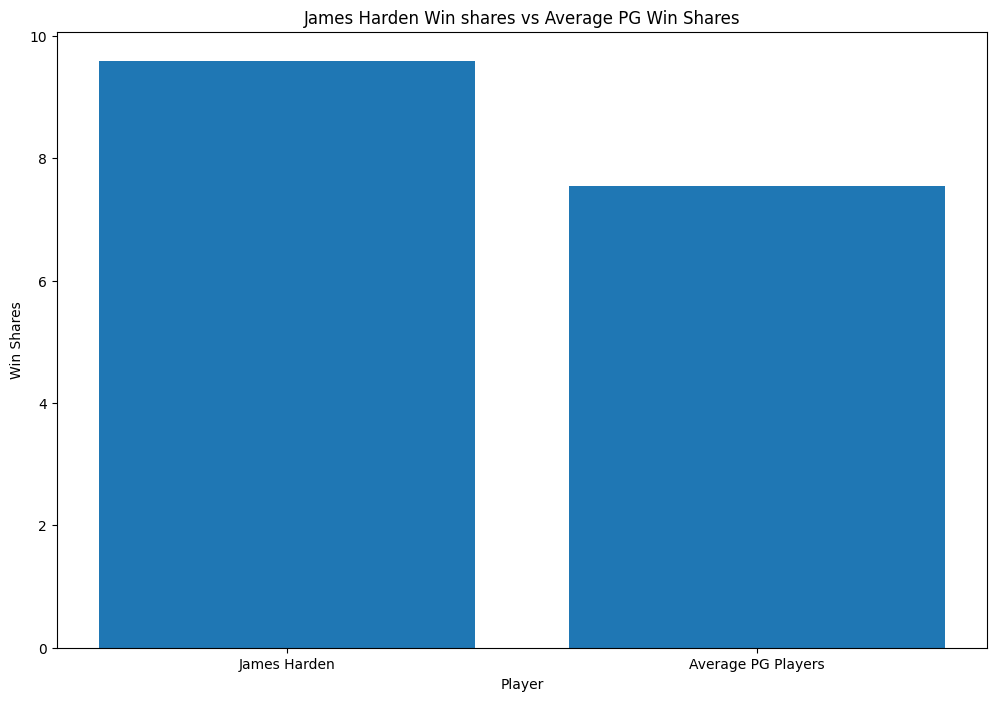

In [47]:
# Comparative Analysis for Win Shares
plt.figure(figsize=(12,8))
plt.bar(['James Harden', 'Average PG Players'], [final_df[final_df['playerName']=='James Harden']['winShares'].mean(), final_df[final_df['position']=='PG']['winShares'].mean()])
plt.title('James Harden Win shares vs Average PG Win Shares')
plt.xlabel('Player')
plt.ylabel('Win Shares')

Text(0.5, 1.0, 'Correlation between Usage Percent and Points for James Harden')

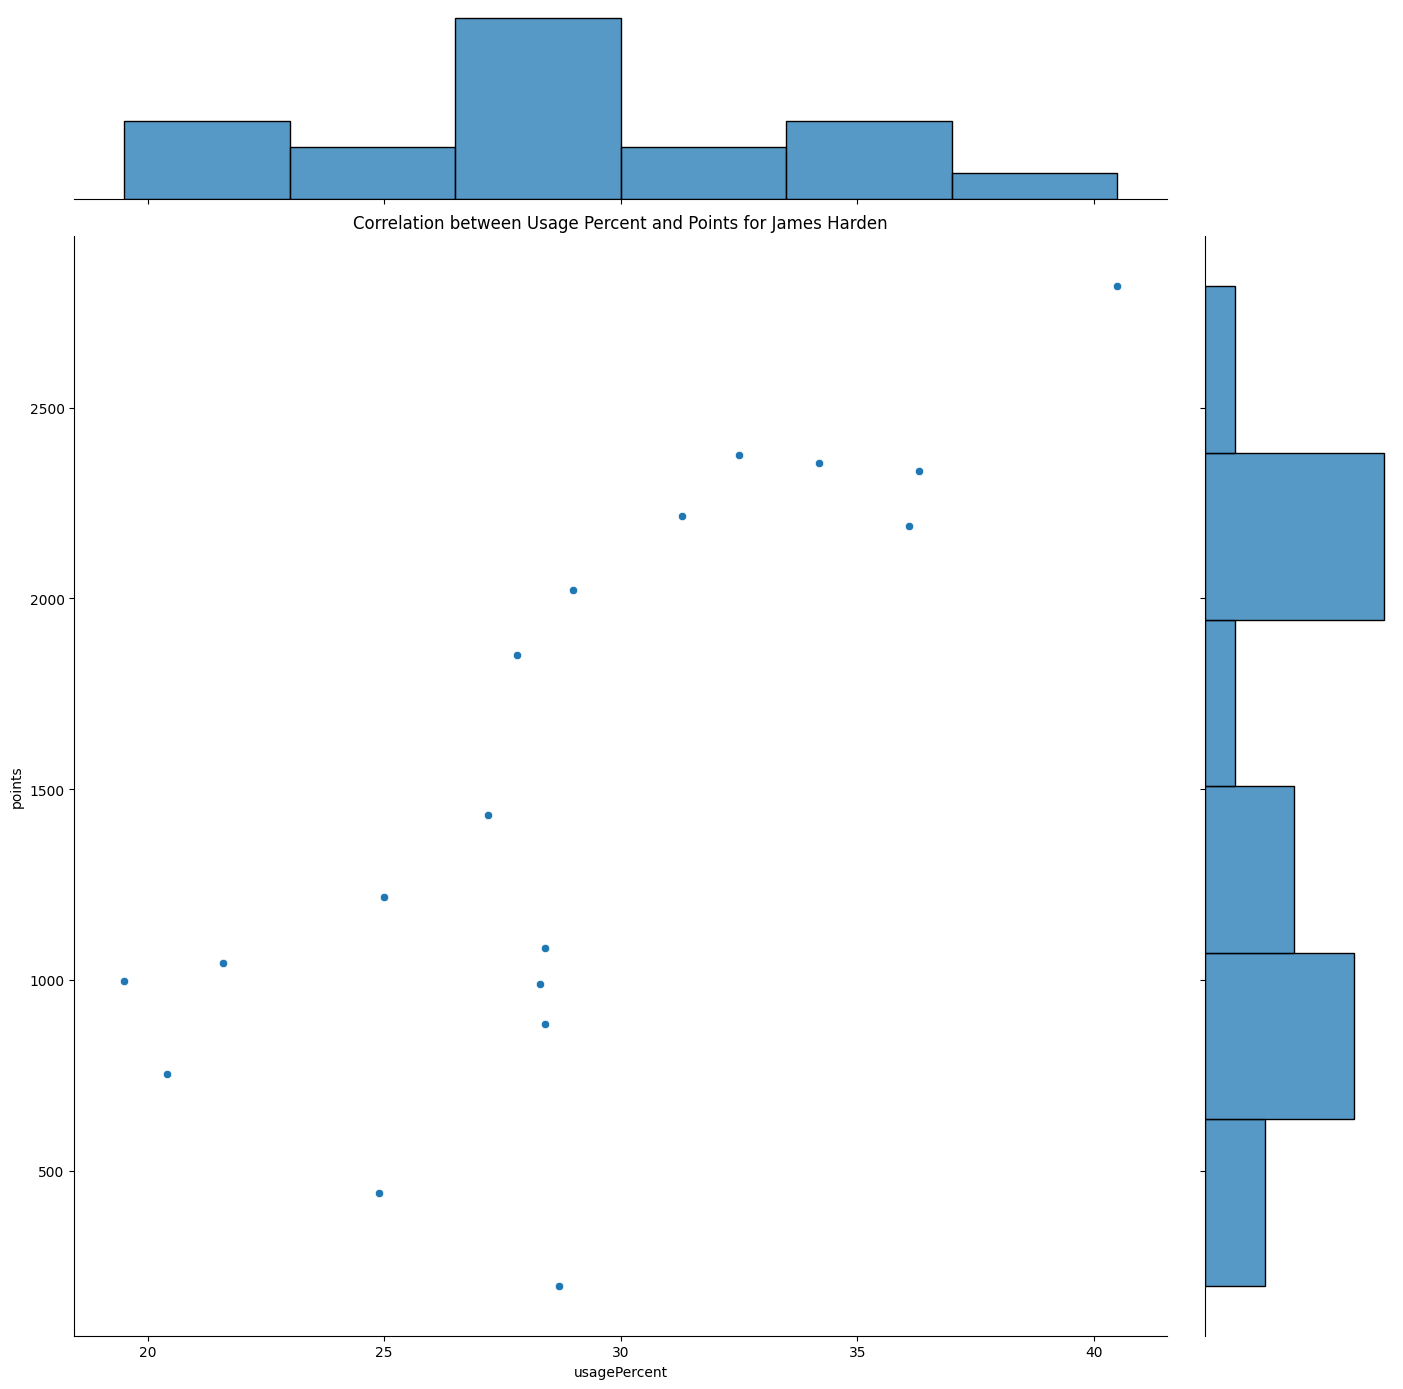

In [48]:
# Correlation Analysis for Points and UsagePercent
sns.jointplot(x='usagePercent', y='points', data=final_df[final_df['playerName']=='James Harden'], height=14)
plt.title('Correlation between Usage Percent and Points for James Harden')